# Analysis for long-range contacts

by Pu Zheng 

2022.06.21

In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

31148


In [2]:
plt.style.use('dark_background')

In [3]:
from matplotlib.colors import LogNorm
_ticklabel_width = 0.5
_ticklabel_size = 1
_font_size = 7.5

figure_folder = r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\20220402plus0316_MERFISH\pu_figures_v2'
if not os.path.exists(figure_folder):
    os.makedirs(figure_folder)

## Load codebook

In [4]:
import pandas as pd
codebook = pd.read_csv(r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\20220402plus0316_MERFISH\merged_codebook_w_celltype.csv')
bit_columns = [_n for _n in codebook.columns if 'NDB' in _n]

In [5]:
codebook

,name,id,NDB_784,NDB_755,NDB_826,NDB_713,NDB_865,NDB_725,NDB_817,NDB_710,...,NDB_608,NDB_460,NDB_563,NDB_592,NDB_368,NDB_436,NDB_629,NDB_604,cell_type,chr_as_num
0,1:3740000-3760000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,['None'],1
1,1:6240000-6260000,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,['None'],1
2,1:8740000-8760000,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,['None'],1
3,1:11240000-11260000,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,['None'],1
4,1:13740000-13760000,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,['None'],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,X:101910335-102015609,2049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,['L6_CT'],23
1952,X:136772307-136851006,2050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,['Oligo'],23
1953,X:140481839-140547985,2051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['Astro', 'MicroPVM']",23
1954,X:167122110-167191320,2052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,['MicroPVM'],23


## Load contacts for major4types

In [6]:
contact_dict = np.load(r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\20220402plus0316_MERFISH\0402plus0316_major_4class_2_summary_dict_nonnan100_contact600',
                    allow_pickle=True)

In [7]:
contact_dict.keys()

dict_keys(['Astro', 'Oligo', 'Gluta', 'GABA'])

<IPython.core.display.Javascript object>


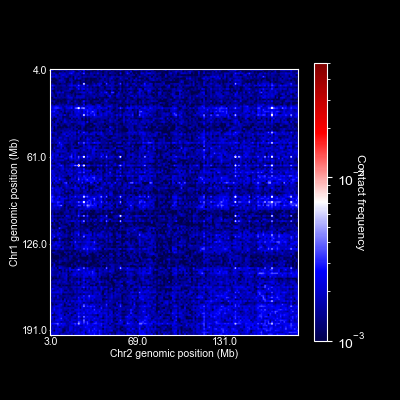

In [8]:
_key = 'Gluta'
sel_feature = ('1', '2')
vmin=1e-3
vmax=5e-2
c1, c2 = sel_feature

c1_codebook = codebook.loc[codebook['chr']==str(c1)].sort_values('chr_order')
c2_codebook = codebook.loc[codebook['chr']==str(c2)].sort_values('chr_order')

c1_ticks = np.arange(0, len(c1_codebook), 50)
c2_ticks = np.arange(0, len(c2_codebook), 50)
c1_starts = np.round([int(_name.split(':')[1].split('-')[0])/1e6 for _name in c1_codebook['name'] ])
c2_starts = np.round([int(_name.split(':')[1].split('-')[0])/1e6 for _name in c2_codebook['name'] ])


fig, _ax = plt.subplots(figsize=(4,4), dpi=100)

_contact_mat = contact_dict[_key][sel_feature]
_pf = _ax.imshow(_contact_mat, cmap='seismic', norm=LogNorm(vmin=vmin, vmax=vmax))
# get ticks
_ax.set_yticks(c1_ticks)
_ax.set_yticklabels(c1_starts[c1_ticks])
_ax.set_ylabel(f"Chr{c1} genomic position (Mb)", fontsize=_font_size, labelpad=1)
_ax.set_xticks(c2_ticks)
_ax.set_xticklabels(c2_starts[c2_ticks])
_ax.set_xlabel(f"Chr{c2} genomic position (Mb)", fontsize=_font_size, labelpad=1)
_ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, ) # remove bottom ticklabels for ax1

cbar = plt.colorbar(_pf, ax=_ax, shrink=0.9)
cbar.set_label('Contact frequency', 
               fontsize=_font_size+1, labelpad=0, rotation=270)

fig.savefig(os.path.join(figure_folder, f'contact_{c1}_{c2}_{_key}.pdf'), transparent=True, dpi=300)
fig.savefig(os.path.join(figure_folder, f'contact_{c1}_{c2}_{_key}.png'), transparent=True, dpi=300)
plt.show()

In [9]:
peak_kernel = np.ones([3,3]) * -1/8
peak_kernel[1,1] = 1

In [10]:
peak_map = scipy.signal.convolve2d(_contact_mat, peak_kernel, mode='same')

In [11]:
peak_map.shape

(153, 143)

<IPython.core.display.Javascript object>


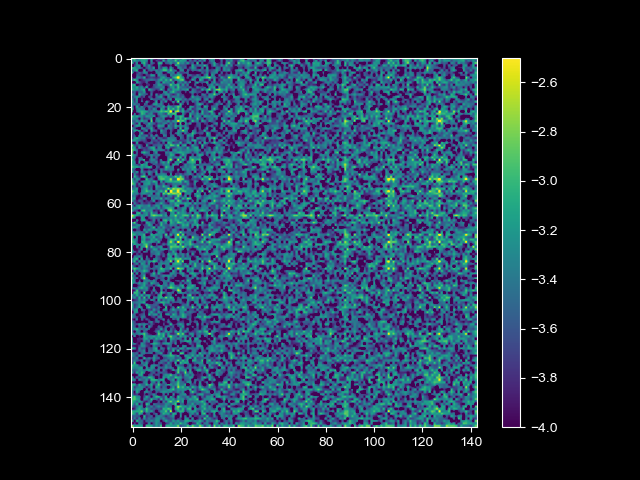

In [12]:
plt.figure()
plt.imshow(np.log(np.abs(peak_map))/np.log(10), vmin=-4, vmax=-2.5)
plt.colorbar()

In [13]:
peak_map.shape

(153, 143)

<IPython.core.display.Javascript object>


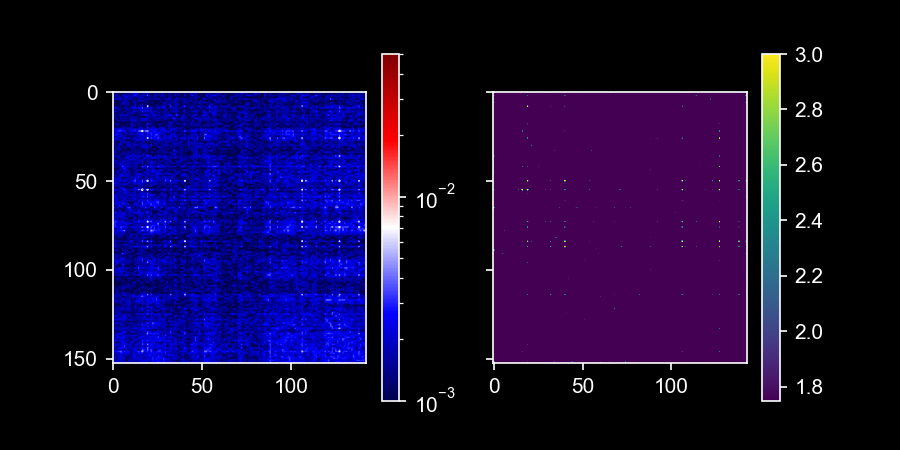

C:\Users\puzheng\AppData\Local\Temp/ipykernel_31148/177901331.py:10: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  pf_contact = axes[0].imshow(contact_dict[_key][sel_feature], vmin=1e-3, vmax=5e-2, cmap='seismic', norm=LogNorm())


In [22]:
_key = 'Gluta'
sel_feature = ('1', '2')
#sel_feature = 'cis'


#peak_map = scipy.signal.convolve2d(contact_dict[_key][sel_feature], peak_kernel, mode='same')
peak_map = contact_dict[_key][sel_feature] / scipy.signal.convolve2d(contact_dict[_key][sel_feature], local_kernel, mode='same')

fig, axes = plt.subplots(1,2, figsize=(6,3), sharex=True, sharey=True, dpi=150)
pf_contact = axes[0].imshow(contact_dict[_key][sel_feature], vmin=1e-3, vmax=5e-2, cmap='seismic', norm=LogNorm())
#pf_peak = axes[1].imshow((np.log(np.abs(peak_map))/np.log(10)) > -2.5,)
pf_peak = axes[1].imshow(np.abs(peak_map), vmin=1.75,vmax=3)

plt.colorbar(pf_contact, ax=axes[0])
plt.colorbar(pf_peak, ax=axes[1])

fig.show()

In [78]:
peak_map / contact_dict[_key][sel_feature]

array([[ 0.85551757, -2.57749928, -2.81313768, ...,  0.24681128,
         0.46683405,  0.66178534],
       [-2.57749928,  0.69241299, -1.96459412, ..., -0.2554449 ,
         0.006719  ,  0.35103245],
       [-2.81313768, -1.96459412,  0.65133495, ..., -0.10704108,
        -0.23118621,  0.30297972],
       ...,
       [ 0.24681128, -0.2554449 , -0.10704108, ...,  0.67341127,
        -2.16371097, -1.74227546],
       [ 0.46683405,  0.006719  , -0.23118621, ..., -2.16371097,
         0.67639569, -1.15761621],
       [ 0.66178534,  0.35103245,  0.30297972, ..., -1.74227546,
        -1.15761621,  0.84176863]])

In [15]:
local_kernel = np.ones([3,3])/9

In [ ]:
_key = 'Gluta'
sel_feature = ('1', '2')
#sel_feature = 'cis_17'

#peak_map = scipy.signal.convolve2d(contact_dict[_key][sel_feature], peak_kernel, mode='same') / contact_dict[_key][sel_feature] 

peak_map = contact_dict[_key][sel_feature] / scipy.signal.convolve2d(contact_dict[_key][sel_feature], local_kernel, mode='same')

fig, axes = plt.subplots(1,2, figsize=(6,3), sharex=True, sharey=True, dpi=150)
pf_contact = axes[0].imshow(contact_dict[_key][sel_feature], vmin=4e-3, vmax=2e-1, cmap='seismic', norm=LogNorm())
#pf_peak = axes[1].imshow((np.log(np.abs(peak_map))/np.log(10)) > 0,)
#pf_peak = axes[1].imshow(np.abs(peak_map)>1.5)
pf_peak = axes[1].imshow(np.abs(peak_map), vmin=1.5,vmax=3)
plt.colorbar(pf_contact, ax=axes[0])
plt.colorbar(pf_peak, ax=axes[1])

fig.show()

<IPython.core.display.Javascript object>


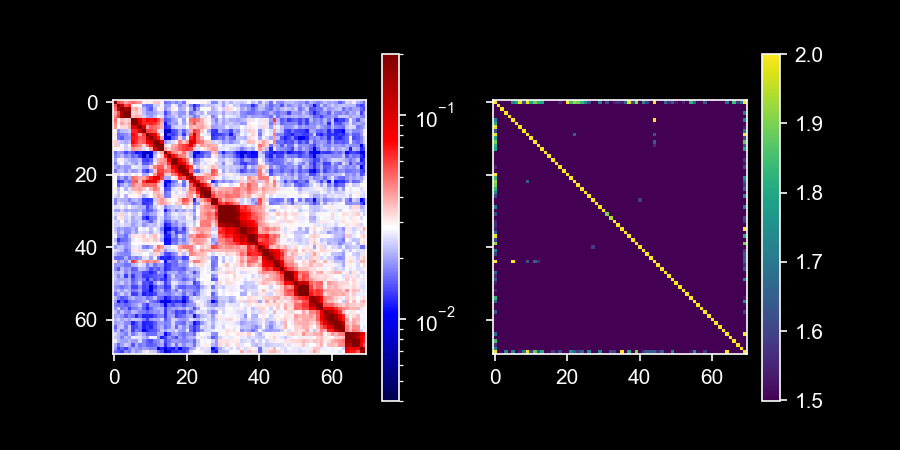

C:\Users\puzheng\AppData\Local\Temp/ipykernel_31148/2380391839.py:10: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  pf_contact = axes[0].imshow(contact_dict[_key][sel_feature], vmin=4e-3, vmax=2e-1, cmap='seismic', norm=LogNorm())


In [21]:
_key = 'Gluta'
#sel_feature = ('1', '2')
sel_feature = 'cis_17'

#peak_map = scipy.signal.convolve2d(contact_dict[_key][sel_feature], peak_kernel, mode='same') / contact_dict[_key][sel_feature] 

peak_map = contact_dict[_key][sel_feature] / scipy.signal.convolve2d(contact_dict[_key][sel_feature], local_kernel, mode='same')

fig, axes = plt.subplots(1,2, figsize=(6,3), sharex=True, sharey=True, dpi=150)
pf_contact = axes[0].imshow(contact_dict[_key][sel_feature], vmin=4e-3, vmax=2e-1, cmap='seismic', norm=LogNorm())
#pf_peak = axes[1].imshow((np.log(np.abs(peak_map))/np.log(10)) > 0,)
#pf_peak = axes[1].imshow(np.abs(peak_map)>1.5)
pf_peak = axes[1].imshow(np.abs(peak_map), vmin=1.5,vmax=2)
plt.colorbar(pf_contact, ax=axes[0])
plt.colorbar(pf_peak, ax=axes[1])

fig.show()